# Feature Extraction for Vehicle Detection
A workbook which runs through the facets of 3 feature extraction techniques for object detection and tunes various parameters of all 3 on random images from the training data for the project

In [1]:
# imports. note that feature_extraction contains the 3 functions for feature extraction
import feature_extraction as fe
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from skimage import exposure
import random
%matplotlib inline

In [2]:
# the training data is stored in a central location defined below.
# Globbing reads multiple sub directories to build a list of image files
cars = glob.glob('../playground/exploration/vehicles/**/*.png', recursive=True)
notcars = glob.glob('../playground/exploration/non-vehicles/**/*.png', recursive=True)

In [19]:
# the color list is used as a helper for image color conversion
color_list = {
    'RGB': cv2.COLOR_BGR2RGB,
    'HSV': cv2.COLOR_BGR2HSV,
    'LUV': cv2.COLOR_BGR2LUV,
    'HLS': cv2.COLOR_BGR2HLS,
    'YUV': cv2.COLOR_BGR2YUV,
    'YCrCb': cv2.COLOR_BGR2YCrCb
}

## Explore Spatial Binning
The first technique is spatial binning which expects a 3 channel image. The function resizes the image to the size parameter, unfurls the pixels to a flattened list for each channel and then concatenates each channel to a single feature list.

The section below investigates 3 re-sizing parameters and the list of color spaces defined above for a vehicle and non-vehicle image

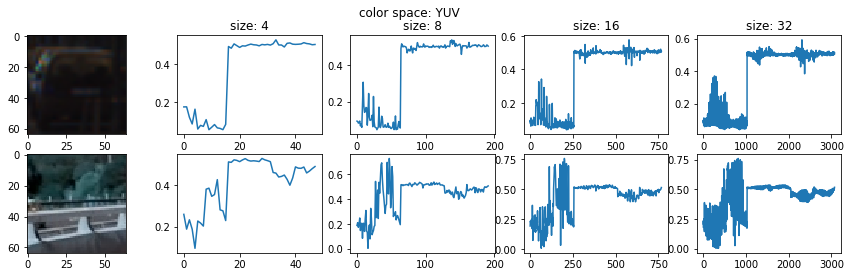

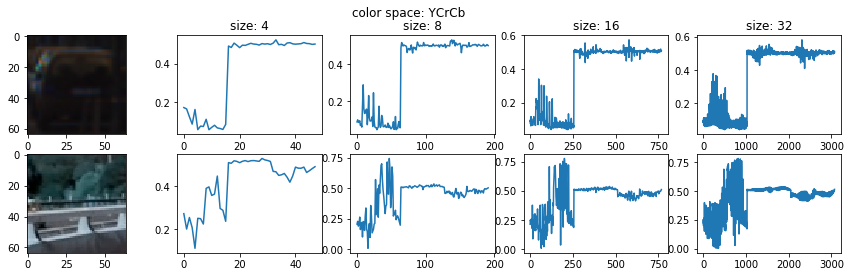

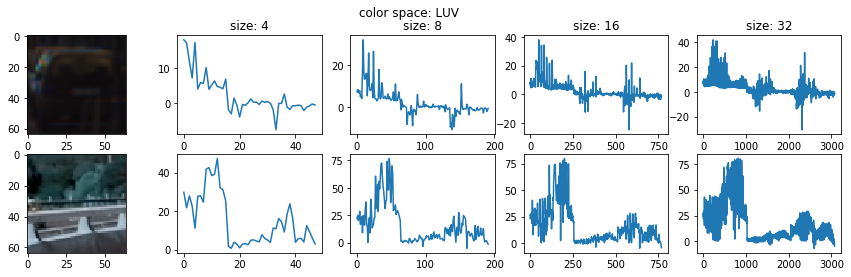

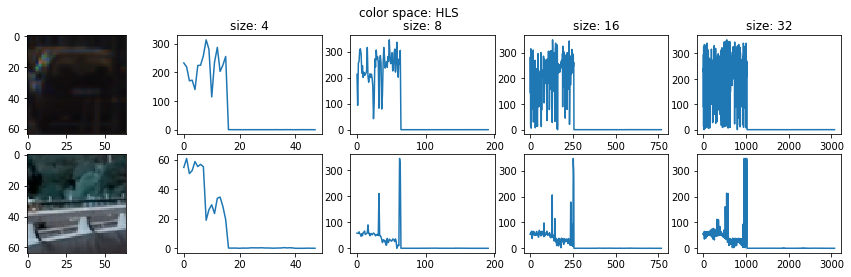

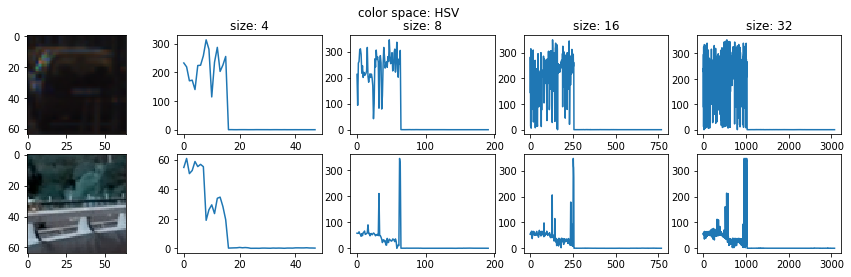

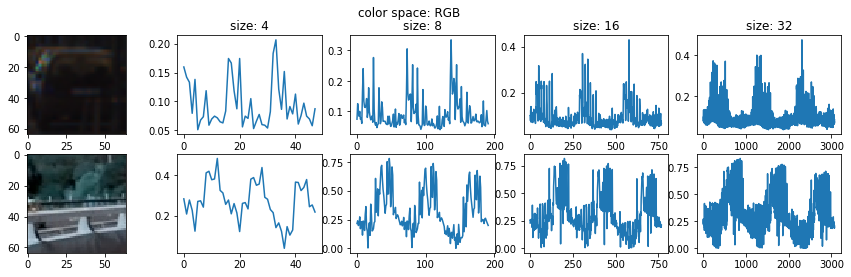

In [20]:
# select random vehicle and non-vehicle images and rescale to 0..1 will open as BGR
img_v = cv2.imread(cars[random.randrange(0,len(cars))])
img_v = img_v.astype(np.float32)/255
img_nv = cv2.imread(notcars[random.randrange(0,len(notcars))])
img_nv = img_nv.astype(np.float32)/255

# define the parameter list for size - the training data is 64x64
sizes = [4,8,16,32]

# cycle through the color_list and sizes list and show the various results...
for key in color_list:
    # create an output figure
    fig, ax = plt.subplots(2,len(sizes)+1,figsize=(15,4))
    plt.suptitle("color space: {}".format(key))
    c = 0
    # create an image copy for the color space
    img_pv = cv2.cvtColor(img_v, color_list[key])
    img_pnv = cv2.cvtColor(img_nv, color_list[key])
    ax[0,c].imshow(img_v)
    ax[1,c].imshow(img_nv)
    c += 1
    # cycle the sizes
    for size in sizes:
        feature_vec_v = fe.bin_spatial(img_pv, size=(size,size))
        feature_vec_nv = fe.bin_spatial(img_pnv, size=(size,size))
        ax[0,c].plot(feature_vec_v)
        ax[0,c].set_title("size: {}".format(size))
        ax[1,c].plot(feature_vec_nv)
        c += 1
plt.show()

## Explore the color histogram
The second technique is to get a histogram of each channel and to concatenate these together to obtain a flattened feature list. 

It's possible to tune the output using the color space and the number of bins. The bin range should reflect the extent of the pixel values - in the case of our training data this is 0..1

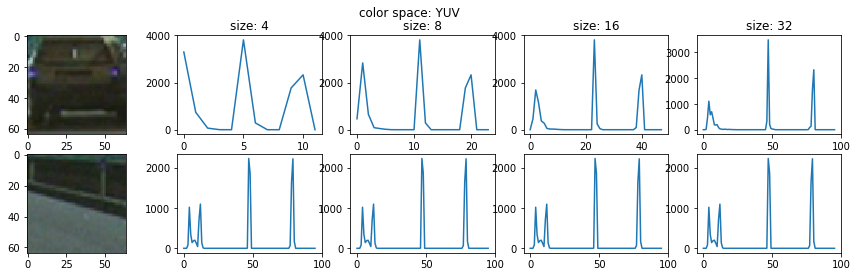

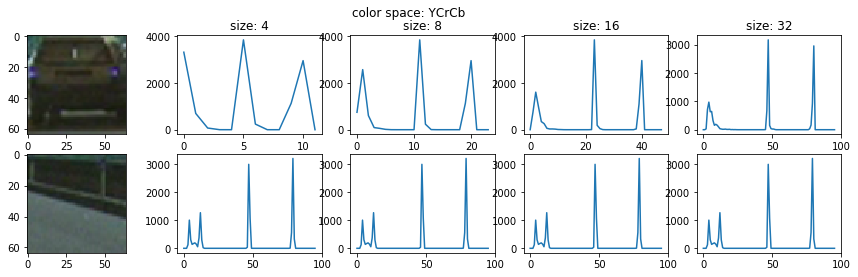

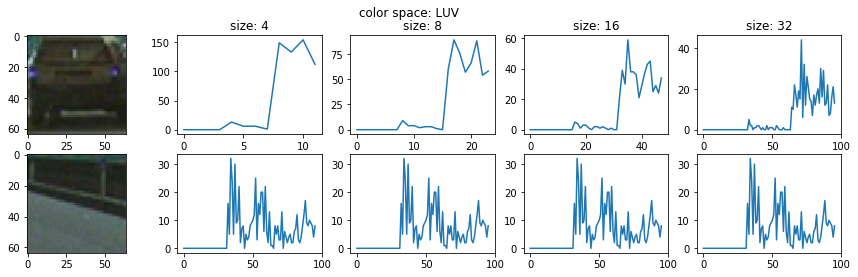

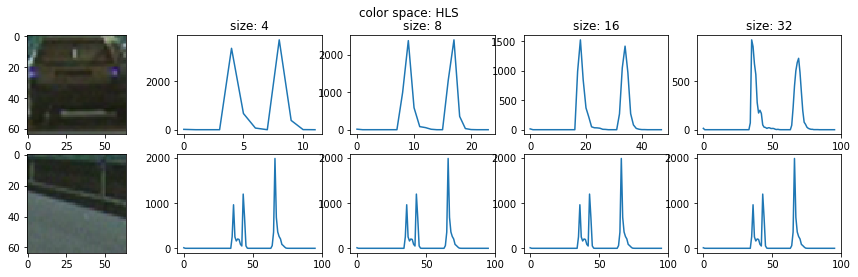

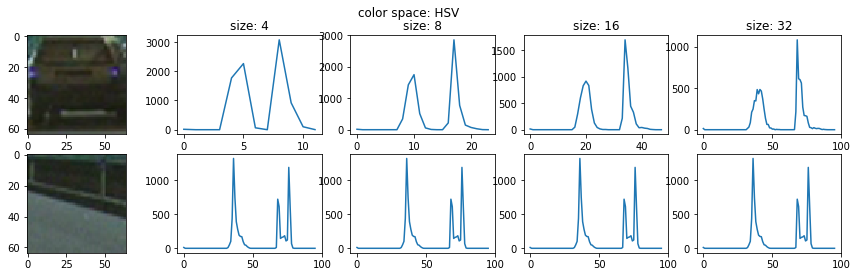

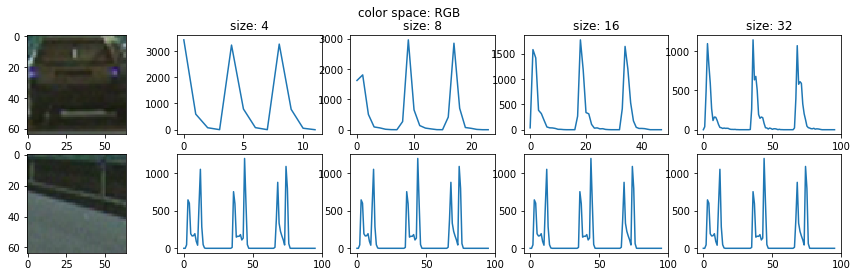

In [21]:
# select random vehicle and non-vehicle images and rescale to 0..1, will open as BGR
img_v = cv2.imread(cars[random.randrange(0,len(cars))])
img_v = img_v.astype(np.float32)/255
img_nv = cv2.imread(notcars[random.randrange(0,len(notcars))])
img_nv = img_nv.astype(np.float32)/255

# define the parameter list for bin ranges - the training data is 64x64
sizes = [4,8,16,32]

# cycle through the color_list and sizes list and show the various results...
for key in color_list:
    # create an output figure
    fig, ax = plt.subplots(2,len(sizes)+1,figsize=(15,4))
    plt.suptitle("color space: {}".format(key))
    c = 0
    # create an image copy for the color space
    img_pv = cv2.cvtColor(img_v, color_list[key])
    img_pnv = cv2.cvtColor(img_nv, color_list[key])
    ax[0,c].imshow(img_v)
    ax[1,c].imshow(img_nv)
    c += 1
    # cycle the sizes
    for size in sizes:
        feature_vec_v = fe.color_hist(img_pv, nbins=size)
        feature_vec_nv = fe.color_hist(img_pnv)
        ax[0,c].plot(feature_vec_v)
        ax[0,c].set_title("size: {}".format(size))
        ax[1,c].plot(feature_vec_nv)
        c += 1
plt.show()

## Explore Hog Features
The last technique is Histogram of Oriented Features. The write up will contain a fuller description of how this works. The tuning parameters for this function are the color space, the number of bins for the histograms (orientations), the pixels per cell and the cells per block

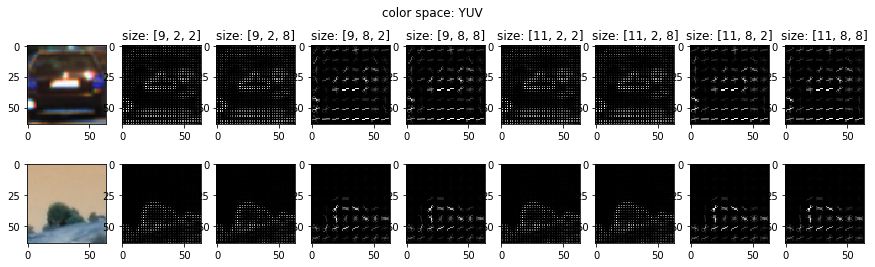

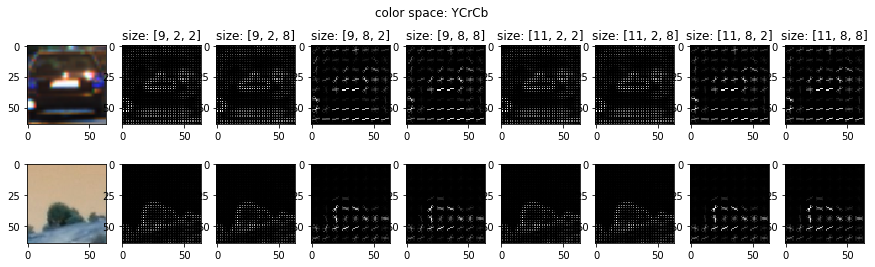

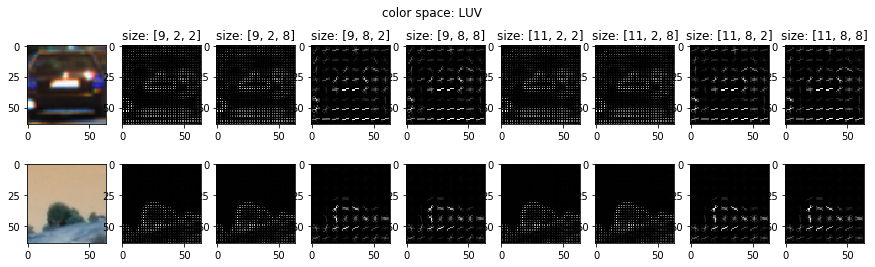

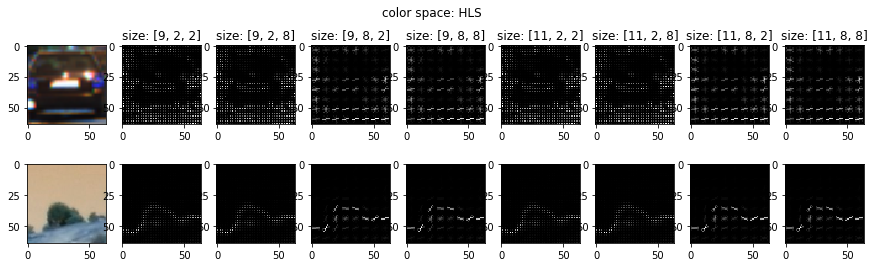

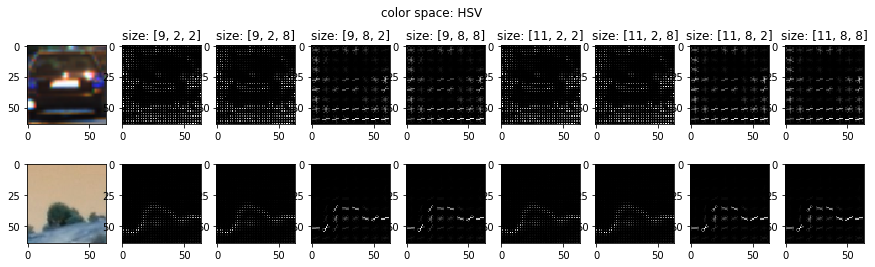

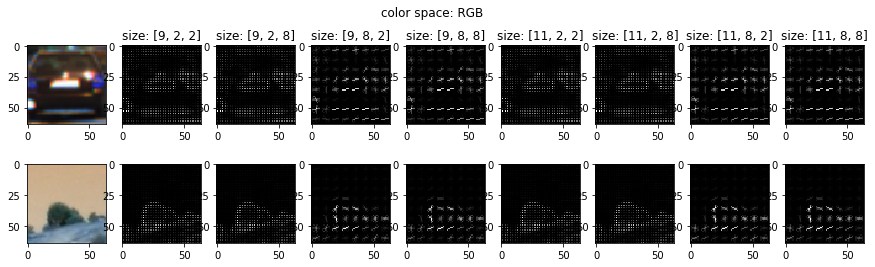

In [22]:
# select random vehicle and non-vehicle images and rescale to 0..1, will open as BGR
img_v = cv2.imread(cars[random.randrange(0,len(cars))])
img_v = img_v.astype(np.float32)/255
img_nv = cv2.imread(notcars[random.randrange(0,len(notcars))])
img_nv = img_nv.astype(np.float32)/255

# hog parameters: orientations, pixels per cell, cells per block
hog_list = [
    [9,11],
    [2,8],
    [2,8]
]

# create flattened list of hog tuning parameters
hog_params = [[x,y,z] for x in hog_list[0] for y in hog_list[1] for z in hog_list[2]]

for key in color_list:
    # create an output figure
    fig, ax = plt.subplots(2,len(hog_params)+1,figsize=(15,4))
    plt.suptitle("color space: {}".format(key))
    c = 0
    # create an image copy for the color space
    img_pv = cv2.cvtColor(img_v, color_list[key])
    img_pnv = cv2.cvtColor(img_nv, color_list[key])
    ax[0,c].imshow(img_v)
    ax[1,c].imshow(img_nv)
    c += 1
    # cycle the params
    for param in hog_params:
        feature_vec_v, hog_image_v = fe.get_hog_features(img_pv[:,:,0], orient=param[0], 
                        pix_per_cell=param[1], cell_per_block=param[2], 
                        vis=True, feature_vec=False)
        img_v_r = exposure.rescale_intensity(hog_image_v, in_range=(0, 10))
        feature_vec_nv, hog_image_nv = fe.get_hog_features(img_pnv[:,:,0], orient=param[0], 
                        pix_per_cell=param[1], cell_per_block=param[2], 
                        vis=True, feature_vec=False)
        img_nv_r = exposure.rescale_intensity(hog_image_nv, in_range=(0, 10))
        
        ax[0,c].imshow(img_v_r, cmap='gray')
        ax[0,c].set_title("size: {}".format(param))
        ax[1,c].imshow(img_nv_r, cmap='gray')
        c += 1
plt.show()